In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
from scipy.spatial import distance_matrix
import numpy as np
import matplotlib.pyplot as plt
import itertools
import copy
from TrackReconstruction_functions import *

pd.options.mode.chained_assignment = None  # Disable the warning


pressure=1
diffusion="nodiff"

# hits = pd.read_hdf("../data/ATPC_0nubb/ATPC_0nubb_1bar_smear_1.h5", "MC/hits")
hits = pd.read_hdf("../data/ATPC_0nubb/ATPC_0nubb_1bar_EFilt_smear_2638.h5", "MC/hits")
# hits = pd.read_hdf("../data/TrackReco/ATPC_Bi_1bar_nexus_filtered.h5", "MC/hits"); hits["z"] = hits["z"]+3000

# hits = pd.read_hdf("../data/ATPC_Tl/ATPC_Tl_1bar_smear_1.h5", "MC/hits")

# hits = pd.read_hdf("../data/Trackreco/ATPC_Tl_1bar_nodiff_reco.h5", "data")


# hits = pd.read_hdf("../data/test/test.h5", "MC/hits")

display(hits)
event_list = hits.event_id.unique()
print(event_list)


,event_id,x,y,z,energy
0,321959,-410.572235,-1181.202393,2049.441895,0.009226
1,321959,-408.957703,-1177.483521,2049.495605,0.000248
2,321959,-412.010773,-1186.013062,2049.520752,0.013293
3,321959,-408.062012,-1175.414185,2049.576904,0.001538
4,321959,-405.763214,-1170.482544,2049.633789,0.000843
...,...,...,...,...,...
66952,322032,1472.051880,-1545.291016,526.739502,0.000322
66953,322032,1474.797729,-1545.046875,528.489685,0.001265
66954,322032,1482.435181,-1549.546753,528.700806,0.001885
66955,322032,1481.030518,-1549.226196,529.348267,0.000769


[321959 321960 321961 321962 321963 321965 321966 321967 321968 321969
 321970 321971 321972 321973 321974 321976 321977 321978 321979 321980
 321981 321982 321983 321984 321985 321986 321987 321988 321989 321990
 321991 321992 321993 321994 321995 321996 321997 321998 321999 322000
 322001 322002 322003 322004 322005 322006 322007 322008 322009 322011
 322012 322013 322015 322016 322017 322018 322019 322020 322022 322023
 322024 322025 322026 322027 322028 322029 322030 322032]


,event_id,x,y,z,energy
3892,321963,1003.490601,2511.589600,4464.142578,0.001116
3893,321963,998.276306,2513.652344,4464.439453,0.002158
3894,321963,1029.235474,2504.455322,4464.560059,0.002976
3895,321963,1004.767273,2511.051758,4464.701660,0.001240
3896,321963,1035.234131,2502.902100,4465.627930,0.002282
...,...,...,...,...,...
4939,321963,656.020203,2358.118164,5187.608398,0.000298
4940,321963,672.099426,2357.458496,5187.808594,0.000670
4941,321963,658.430115,2358.894287,5188.048828,0.001587
4942,321963,669.941895,2359.544189,5188.301758,0.001587


Diffussion smear is:  0.1 mm/sqrt(cm)
Energy threshold is:  0.0 keV
diffision scale factor is:  7
Radius scale factor is:  10
Hit grouping factor is:  2.1
Tortuosity distance scale is: 70.0
mean_sigma: 15
Running grouping again new mean sigma is: 25


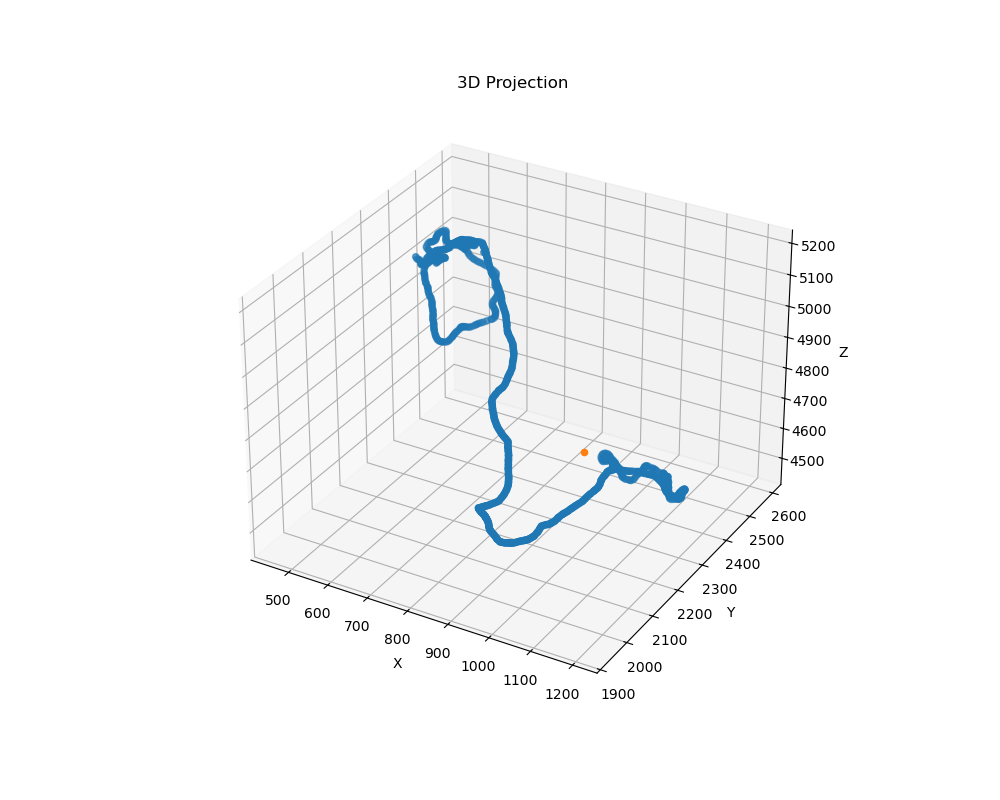

In [5]:
%matplotlib widget

data = hits[hits.event_id ==event_list[4]]
# data = hits[hits.event_id ==395909]

# There seems to be a duplicate row sometimes
data = data.drop_duplicates()

display(data)
# eid = data.event_id.item()
data = data[['event_id', 'x', 'y', 'z',"energy"]]


# Apply grouping
Diff_smear, energy_threshold, diff_scale_factor, radius_sf, group_sf, Tortuosity_dist = InitializeParams(pressure, diffusion)

print("Diffussion smear is: ",        Diff_smear,            "mm/sqrt(cm)")
print("Energy threshold is: ",        1000*energy_threshold, "keV")
print("diffision scale factor is: ",  diff_scale_factor)
print("Radius scale factor is: ",     radius_sf)
print("Hit grouping factor is: ",     group_sf)
print("Tortuosity distance scale is:", Tortuosity_dist)

mean_sigma = round(diff_scale_factor*Diff_smear*np.sqrt(0.1*data.z.mean()))
print("mean_sigma:", mean_sigma)

reco_DE_event = data.copy()

mean_sigma_group = group_sf*Diff_smear*np.sqrt(0.1*data.z.mean())
data = GroupHits(reco_DE_event, mean_sigma_group)

# Apply energy threshold and redistribute energy
data = CutandRedistibuteEnergy(data, energy_threshold)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for gid in sorted(data.group_id.unique()):
    temp_df = data[data.group_id == gid]
    ax.scatter(temp_df['x'], temp_df['y'], temp_df['z'], marker='o')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Projection')
plt.show()



,event_id,x,y,z,energy,group_id
0,321963,457.269562,2418.884277,5032.680664,0.002802,0
1,321963,457.804871,2419.205566,5031.409180,0.047790,0
2,321963,459.474213,2419.708252,5025.476074,0.017360,0
3,321963,460.781311,2421.814209,5024.390625,0.002406,0
4,321963,461.652130,2422.145264,5022.738770,0.000719,0
...,...,...,...,...,...,...
1047,321963,1202.121826,2285.923584,4622.266113,0.000496,0
1048,321963,1202.530884,2296.661377,4613.121094,0.001637,0
1049,321963,1202.739380,2288.441895,4620.347656,0.003745,0
1050,321963,1203.051392,2293.875488,4615.491211,0.006845,0


Median distance to the closest row: 2.512950817626919


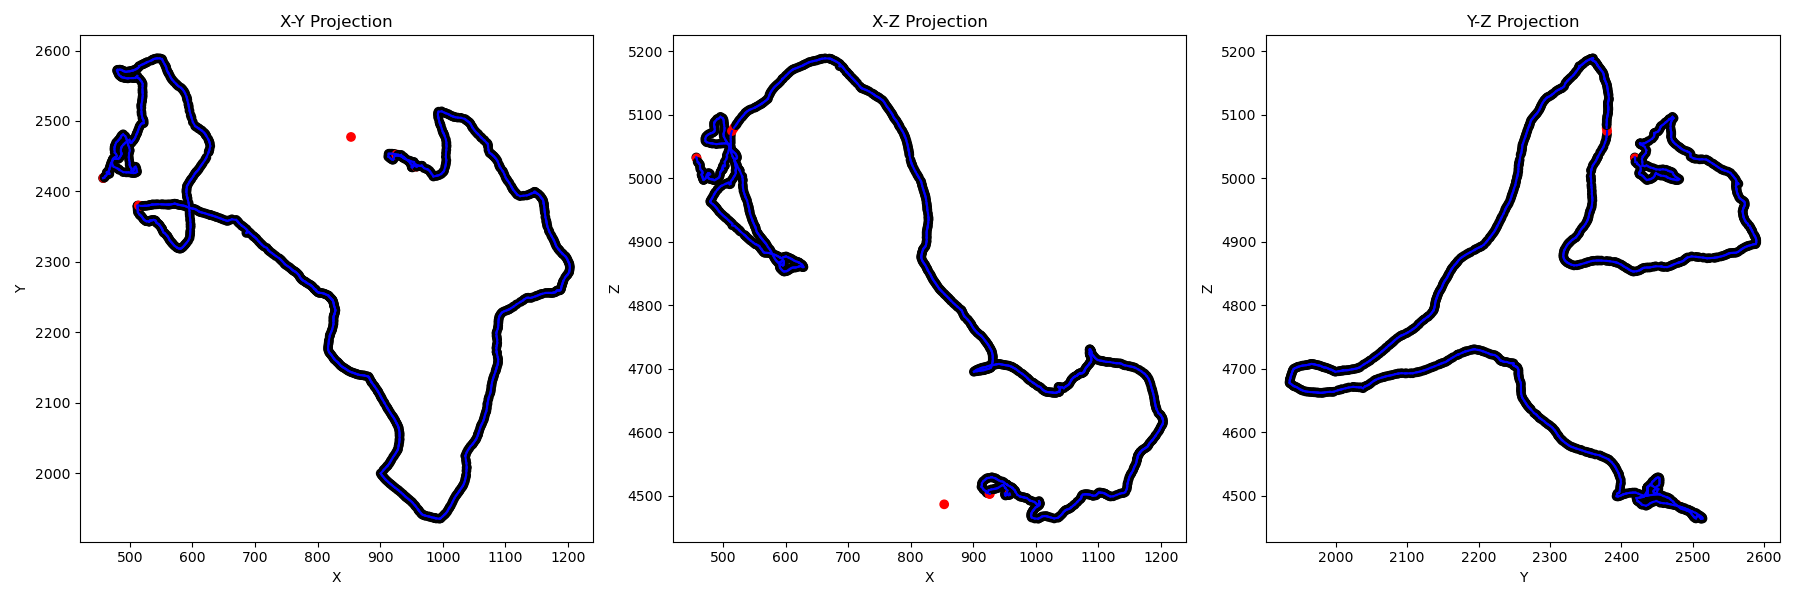

In [6]:




# shuffle the data to ensure we dont use g4 ordering
data = data.sample(frac=1).reset_index(drop=True)

# then sort it based on the x,y,z
data = data.sort_values(by=['x', "y", "z"]).reset_index(drop=True)

display(data)

df = pd.DataFrame(data)

# Calculate the distance matrix
dist_matrix = distance_matrix(data[['x', 'y', 'z']], data[['x', 'y', 'z']])

# Initialize connections counter, keeps track of number of connections to each index
connection_count = np.zeros(len(data), dtype=int)

# This is a dict, format is
# index : [connected node 1, connected node 2,...]
connected_nodes = {}
connections = []

# Tunable parameters
Meadian_dist = GetMedianNodeDistances(data) # Median distance between nodes
init_dist_thresh = Meadian_dist*2 # max distance for initial connections [mm]
incr_dist_thresh = np.linspace(1, Meadian_dist*7, 15, dtype=int) # Second stage, look for closest nodes, then slowly increase threshold [mm]
incr_dist_thresh = np.unique(incr_dist_thresh)

dist_threshold = 15 # Third distance threshold for conecting end nodes [mm]


for i in range(len(data)):
    # Find the index of the closest node (excluding itself)
    # closest_idx = np.argpartition(dist_matrix[i], 1)[1]
    closest_idx = np.argsort(dist_matrix[i])[1]
    
    # Check if the connection already exists 
    if closest_idx not in connected_nodes.get(i, []) and i not in connected_nodes.get(closest_idx, []):

        # Check the proposed node has 0 or 1 connection, the connection is within the dist threshold and is within the same group
        if (connection_count[closest_idx] <= 1 and connection_count[i] <= 1 and dist_matrix[i][closest_idx] < init_dist_thresh and CheckSameGroup(data, i, closest_idx)):
            
            cycle  = Testcycle(i, closest_idx ,connected_nodes, connections, connection_count)
            
            # Add connection between node i and closest_idx if it doesnt form a cycle
            if (not cycle):
                connected_nodes, connections, connection_count = UpdateConnections(i, closest_idx, connected_nodes, connections, connection_count)

# Get indices where the value is 1
single_nodes = np.where(connection_count == 1)[0]

# Incrementally loop over distance steps looking for connections
# starting from a small step size helps lock onto the nearest nodes
for dist in incr_dist_thresh:

    # Connect single nodes to the next closest single node
    for i in single_nodes:
        
        # Connections get updated, so this ensures we dont make a connection to a newly formed connection
        if connection_count[i] == 1:
            
            # Find the index of the closest node with one connection (excluding itself)
            sorted_indices = np.argsort(dist_matrix[i])[1:]
            
            for closest_idx in sorted_indices[:dist]:

                # Check if the index is not itelf and the connection count of the closest index is <=1, also that the proposed node is in the same group
                if closest_idx != i and connection_count[closest_idx] <= 1 and connection_count[i] <= 1 and closest_idx not in connected_nodes.get(i, []) and i not in connected_nodes.get(closest_idx, []) and CheckSameGroup(data, i, closest_idx): 
                    
                    if dist_matrix[i][closest_idx] < dist:

                        cycle  = Testcycle(i, closest_idx ,connected_nodes, connections, connection_count)
                        
                        if not cycle:
                            connected_nodes, connections, connection_count = UpdateConnections(i, closest_idx, connected_nodes, connections, connection_count)
                            break


# Function to plot connections
def plot_connections(ax, x, y, connections, connection_count, x_label, y_label):
    colors = ['r' if count == 1 or count == 0 else 'k' for count in connection_count]
    ax.scatter(x, y, c=colors, marker='o')
    for connection in connections:
        start_node = connection[0]
        end_node = connection[1]
        ax.plot([x[start_node], x[end_node]], [y[start_node], y[end_node]], 'b-')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(f'{x_label}-{y_label} Projection')

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot xy projection
plot_connections(axs[0], data['x'], data['y'], connections, connection_count, 'X', 'Y')

# Plot xz projection
plot_connections(axs[1], data['x'], data['z'], connections, connection_count, 'X', 'Z')

# Plot yz projection
plot_connections(axs[2], data['y'], data['z'], connections, connection_count, 'Y', 'Z')

plt.tight_layout()
plt.show()

/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_44210/518107878.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('Dark2')


{'id': 0, 'start': 1, 'end': 164, 'nodes': [1, 0, 2, 3, 4, 5, 6, 7, 10, 11, 15, 13, 9, 8, 12, 14, 16, 17, 18, 19, 20, 23, 25, 27, 32, 35, 39, 36, 31, 28, 30, 33, 34, 37, 45, 49, 54, 56, 68, 72, 81, 84, 87, 88, 90, 92, 93, 100, 105, 98, 97, 99, 103, 102, 106, 119, 121, 120, 127, 131, 132, 130, 136, 141, 144, 147, 149, 142, 134, 125, 115, 96, 85, 73, 52, 47, 41, 26, 22, 21, 24, 29, 38, 44, 46, 51, 55, 60, 67, 65, 64, 59, 58, 61, 63, 69, 75, 76, 80, 89, 101, 107, 110, 111, 113, 117, 116, 112, 108, 109, 114, 122, 126, 129, 135, 137, 143, 148, 151, 156, 163, 168, 170, 175, 188, 198, 204, 202, 201, 191, 183, 182, 180, 178, 181, 185, 187, 189, 196, 195, 192, 190, 193, 194, 184, 176, 173, 169, 162, 145, 152, 150, 140, 139, 133, 123, 95, 91, 83, 79, 78, 71, 66, 57, 50, 48, 42, 40, 43, 53, 62, 70, 74, 77, 82, 86, 94, 104, 118, 124, 128, 138, 146, 160, 165, 166, 179, 199, 203, 209, 211, 214, 225, 229, 232, 235, 242, 244, 250, 254, 256, 260, 264, 266, 267, 270, 272, 275, 277, 281, 284, 287, 290, 2

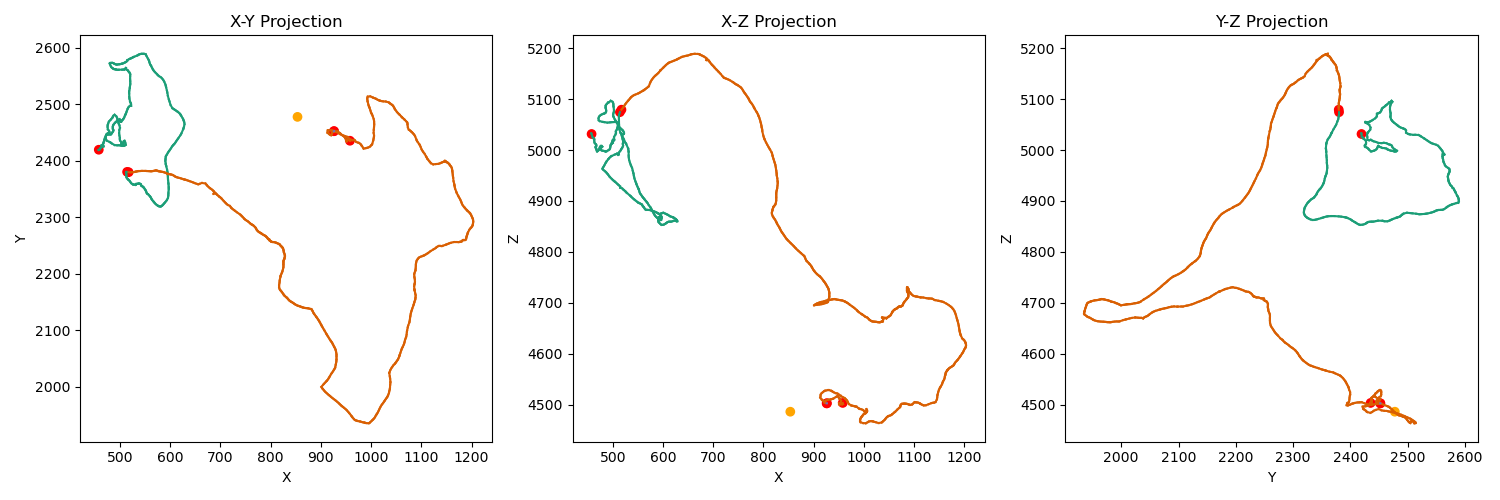

In [7]:
# Track building
colormap = plt.cm.get_cmap('Dark2')
color_cycle = itertools.cycle(colormap.colors)

# Get indices where the value is 1
single_nodes = np.where(connection_count == 1)[0]


Tracks = []

for i,node in enumerate(single_nodes):
    # Check that the track hasnt already been added
    if (check_start_end_exists(node,Tracks)):
        continue

    # Get the track path
    path = GetNodePath(connected_nodes, node, connected_nodes[node][0])

    total_length, total_energy = GetTrackLengthEnergy(path, data)
    color = next(color_cycle)

    Track = {"id":i, "start":path[0], "end":path[-1], "nodes":path, "length":total_length, "energy":total_energy,"label":"track","c":color}
    Tracks.append(Track)


for t in Tracks:
    print(t)

# Function to plot connections
def plot_tracks(ax, x, y, connection_count, x_label, y_label, Tracks_):
    # Filter data for markers with count 1 or 0
    filtered_indices = [i for i, count in enumerate(connection_count) if count == 1 or count == 0 or count == 3]
    filtered_x = [x[i] for i in filtered_indices]
    filtered_y = [y[i] for i in filtered_indices]
    
    # # Define colors for filtered data
    colors = [None] * len(filtered_indices)
    for index, i in enumerate(filtered_indices):
        if connection_count[i] == 1:
            colors[index] = "r"
        elif (connection_count[i] == 0):
            colors[index] = "Orange"
        else:
            colors[index] = "DarkGreen"

    
    # Plot filtered markers
    ax.scatter(filtered_x, filtered_y, c=colors, marker='o')

    # Plot connections
    for Track in Tracks_:
        for i, connection in enumerate(Track["nodes"]):
            if i == len(Track["nodes"]) - 1:
                break

            start_node = Track["nodes"][i]
            end_node = Track["nodes"][i + 1]

            ax.plot([x[start_node], x[end_node]],
                    [y[start_node], y[end_node]], color=Track["c"], linestyle="-")
            
        if (Track["label"] == "vertex"):
            ax.plot(x[Track["start"]], y[Track["start"]], marker = "x", color = "r" )
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(f'{x_label}-{y_label} Projection')


# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot xy projection
plot_tracks(axs[0], data['x'], data['y'], connection_count, 'X', 'Y', Tracks)

# Plot xz projection
plot_tracks(axs[1], data['x'], data['z'], connection_count, 'X', 'Z', Tracks)

# Plot yz projection
plot_tracks(axs[2], data['y'], data['z'], connection_count, 'Y', 'Z', Tracks)

plt.tight_layout()
plt.show()

In [8]:
print(GetMedianNodeDist(Tracks, data))

dist_threshold = 4*GetMedianNodeDist(Tracks, data)
print("Dist Thresh",dist_threshold)

3.241
Dist Thresh 12.964


In [9]:
# Now look to merge tracks that are close by and identify deltas

# Add in any nodes without connections to the tracks as gammas and re-label other tracks as gammas
AddConnectionlessNodes(connection_count, Tracks, data)


In [10]:

finished = False  # Initial state

q = 0
while not finished:
    print("Loop: ", q)
    # finished, Tracks2 = ConnectTracks(Tracks2, temp_connections_dict, temp_connections, temp_connection_count)
    finished, Tracks, connected_nodes, connections, connection_count = ConnectTracks(Tracks, connected_nodes, connections, connection_count, dist_matrix, dist_threshold, data)
    q=q+1

print(finished)

print("Total Tracks:", len(Tracks))

for t in Tracks:
    print(t)



Loop:  0
Loop:  1
True
Total Tracks: 3
{'id': 3, 'start': 646, 'end': 648, 'nodes': [639, 646, 648], 'length': 0.659, 'energy': 0.03432319831335917, 'label': 'track', 'c': 'black'}
{'id': 4, 'start': 565, 'end': 565, 'nodes': [565], 'length': 0, 'energy': 0.014731200411915779, 'label': 'gamma', 'c': 'y'}
{'id': 5, 'start': 1, 'end': 712, 'nodes': [1, 0, 2, 3, 4, 5, 6, 7, 10, 11, 15, 13, 9, 8, 12, 14, 16, 17, 18, 19, 20, 23, 25, 27, 32, 35, 39, 36, 31, 28, 30, 33, 34, 37, 45, 49, 54, 56, 68, 72, 81, 84, 87, 88, 90, 92, 93, 100, 105, 98, 97, 99, 103, 102, 106, 119, 121, 120, 127, 131, 132, 130, 136, 141, 144, 147, 149, 142, 134, 125, 115, 96, 85, 73, 52, 47, 41, 26, 22, 21, 24, 29, 38, 44, 46, 51, 55, 60, 67, 65, 64, 59, 58, 61, 63, 69, 75, 76, 80, 89, 101, 107, 110, 111, 113, 117, 116, 112, 108, 109, 114, 122, 126, 129, 135, 137, 143, 148, 151, 156, 163, 168, 170, 175, 188, 198, 204, 202, 201, 191, 183, 182, 180, 178, 181, 185, 187, 189, 196, 195, 192, 190, 193, 194, 184, 176, 173, 169,

{'id': 0, 'start': 1, 'end': 712, 'length': 3528.116, 'energy': 2.3957296077715, 'label': 'Primary', 'c': 'Teal', 'nodes': [1, 0, 2, 3, 4, 5, 6, 7, 10, 11, 15, 13, 9, 8, 12, 14, 16, 17, 18, 19, 20, 23, 25, 27, 32, 35, 39, 36, 31, 28, 30, 33, 34, 37, 45, 49, 54, 56, 68, 72, 81, 84, 87, 88, 90, 92, 93, 100, 105, 98, 97, 99, 103, 102, 106, 119, 121, 120, 127, 131, 132, 130, 136, 141, 144, 147, 149, 142, 134, 125, 115, 96, 85, 73, 52, 47, 41, 26, 22, 21, 24, 29, 38, 44, 46, 51, 55, 60, 67, 65, 64, 59, 58, 61, 63, 69, 75, 76, 80, 89, 101, 107, 110, 111, 113, 117, 116, 112, 108, 109, 114, 122, 126, 129, 135, 137, 143, 148, 151, 156, 163, 168, 170, 175, 188, 198, 204, 202, 201, 191, 183, 182, 180, 178, 181, 185, 187, 189, 196, 195, 192, 190, 193, 194, 184, 176, 173, 169, 162, 145, 152, 150, 140, 139, 133, 123, 95, 91, 83, 79, 78, 71, 66, 57, 50, 48, 42, 40, 43, 53, 62, 70, 74, 77, 82, 86, 94, 104, 118, 124, 128, 138, 146, 160, 165, 166, 179, 199, 203, 209, 211, 214, 225, 229, 232, 235, 242, 2

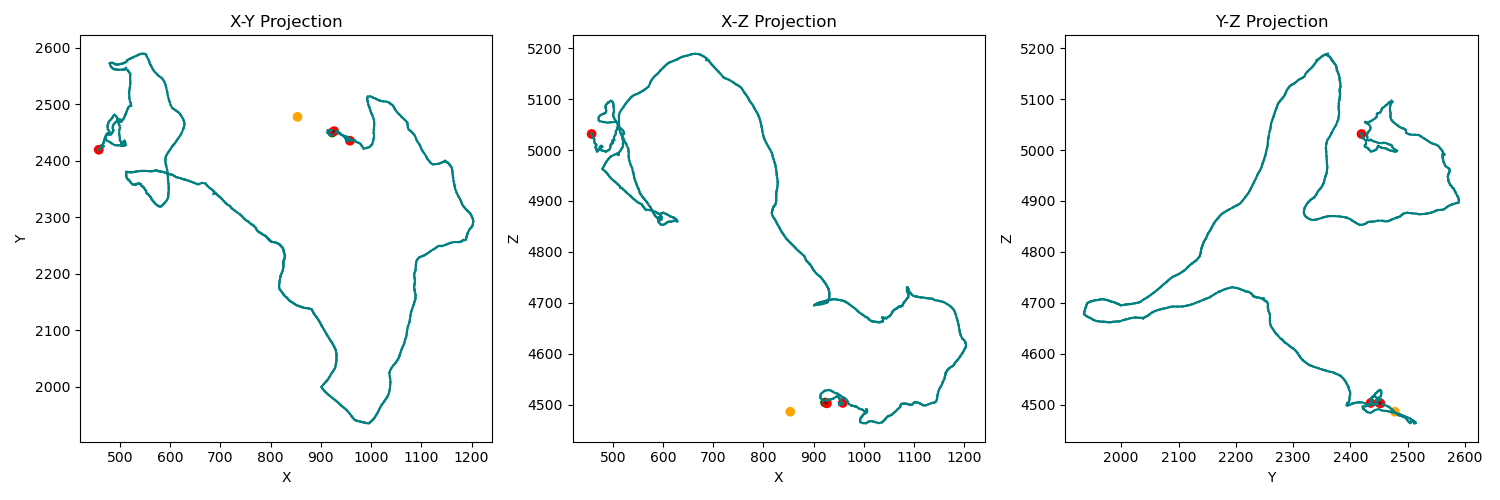

In [11]:


RebuiltTrack, pass_flag = RebuildTracks(connected_nodes, connection_count, data)

for t in RebuiltTrack:
    print(t)

print(pass_flag)


# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot xy projection
plot_tracks(axs[0], data['x'], data['y'], connection_count, 'X', 'Y', RebuiltTrack)

# Plot xz projection
plot_tracks(axs[1], data['x'], data['z'], connection_count, 'X', 'Z', RebuiltTrack)

# Plot yz projection
plot_tracks(axs[2], data['y'], data['z'], connection_count, 'Y', 'Z', RebuiltTrack)

# axs[0].scatter(data["x"].iloc[25], data["y"].iloc[25])

plt.tight_layout()
plt.show()



In [12]:
# Get the track with the most nodes, this is taken to be the primary

num_nodes = 0
primary_track_id = -1
primary_nodes = []

for t in RebuiltTrack:
    if ( len(t["nodes"]) > num_nodes):
        num_nodes = len(t["nodes"])
        primary_track_id = t["id"]
        primary_nodes = t["nodes"]

print("The primary track is: ", primary_track_id)

# This list makes sure we only have one angle per node
all_visited = []

Primary_Track = data.reindex(primary_nodes)
Primary_Track = GetAnglesDF(Primary_Track, all_visited, 1, primary_track_id)
all_visited = all_visited + primary_nodes

df_angles = pd.DataFrame()
df_angles = pd.concat([df_angles, Primary_Track], ignore_index=True)

for t in RebuiltTrack:

    trk_nodes = t["nodes"]
    if t["id"] == primary_track_id:
        continue
    else:
        
        # See if the first/last node has three connections. If it does then flip the track
        con_end = connection_count[t["nodes"][-1]]
        if (con_end == 3):
            trk_nodes = trk_nodes[::-1]
        
        trk = data.reindex(trk_nodes)

        trk = GetAnglesDF(trk, all_visited, 0, t["id"])
        all_visited = all_visited + trk_nodes
        df_angles = pd.concat([df_angles, trk], ignore_index=True)


# Primary_Track.reset_index(drop=True, inplace=True)
pd.set_option('display.max_rows', 100)
display(df_angles)

print(connected_nodes)



The primary track is:  0


,event_id,x,y,z,energy,group_id,id,primary,trkID,cumulative_distance,angle
0,321963,457.804871,2419.205566,5031.409180,0.047790,0,1,1,0,0.000000,0.000000
1,321963,457.269562,2418.884277,5032.680664,0.002802,0,0,1,0,1.416494,23.628192
2,321963,459.474213,2419.708252,5025.476074,0.017360,0,2,1,0,8.995777,171.054639
3,321963,460.781311,2421.814209,5024.390625,0.002406,0,3,1,0,11.701652,52.667695
4,321963,461.652130,2422.145264,5022.738770,0.000719,0,4,1,0,13.598109,45.002118
...,...,...,...,...,...,...,...,...,...,...,...
1047,321963,958.511597,2435.178223,4501.915527,0.007043,0,713,1,0,3525.939868,44.108023
1048,321963,957.833008,2435.121338,4503.982422,0.003943,0,712,1,0,3528.116051,88.057091
1049,321963,925.732910,2451.930176,4503.168945,0.033902,0,646,0,1,4.160420,175.907006
1050,321963,926.346130,2452.166504,4503.222168,0.000422,0,648,0,1,4.819755,30.861129


{0: [1, 2], 1: [0], 2: [3, 0], 3: [2, 4], 4: [3, 5], 5: [4, 6], 6: [7, 5], 7: [6, 10], 10: [7, 11], 8: [9, 12], 9: [8, 13], 13: [9, 15], 11: [10, 15], 12: [14, 8], 14: [12, 16], 15: [13, 11], 16: [14, 17], 17: [18, 16], 18: [17, 19], 19: [20, 18], 20: [19, 23], 21: [24, 22], 24: [21, 29], 22: [26, 21], 26: [22, 41], 23: [25, 20], 25: [23, 27], 29: [24, 38], 27: [25, 32], 28: [30, 31], 30: [28, 33], 38: [29, 44], 33: [30, 34], 31: [36, 28], 36: [31, 39], 32: [35, 27], 35: [32, 39], 34: [33, 37], 39: [36, 35], 37: [45, 34], 45: [37, 49], 44: [38, 46], 40: [43, 42], 43: [40, 53], 41: [47, 26], 47: [41, 52], 42: [40, 48], 46: [44, 51], 49: [45, 54], 52: [47, 73], 48: [50, 42], 50: [48, 57], 51: [46, 55], 53: [62, 43], 62: [53, 70], 54: [56, 49], 56: [54, 68], 55: [60, 51], 60: [55, 67], 57: [66, 50], 66: [57, 71], 58: [61, 59], 61: [58, 63], 59: [64, 58], 64: [59, 65], 63: [61, 69], 70: [62, 74], 65: [64, 67], 71: [66, 78], 67: [60, 65], 68: [56, 72], 69: [63, 75], 74: [70, 77], 72: [68, 8

Text(0, 0.5, 'Scatter Angle [deg]')

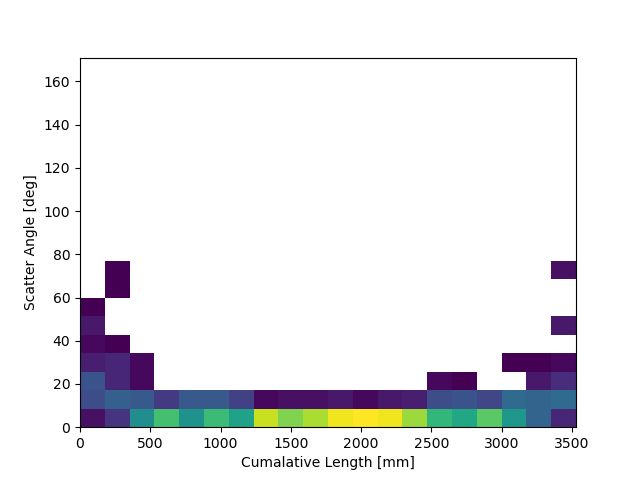

In [13]:
plt.figure()
# plt.scatter(Primary_Track.x, Primary_Track.z)

# plt.scatter(Primary_Track.index, Primary_Track.angle)

# plt.hist(Primary_Track.angle)
# plt.semilogy()
plt.hist2d(Primary_Track.cumulative_distance, Primary_Track.angle, bins = 20,cmin=3);

# plt.scatter(Primary_Track.cumulative_distance, Primary_Track.angle);

# plt.scatter(Primary_Track.cumulative_distance, Primary_Track.angle)

plt.xlabel("Cumalative Length [mm]")
plt.ylabel("Scatter Angle [deg]")

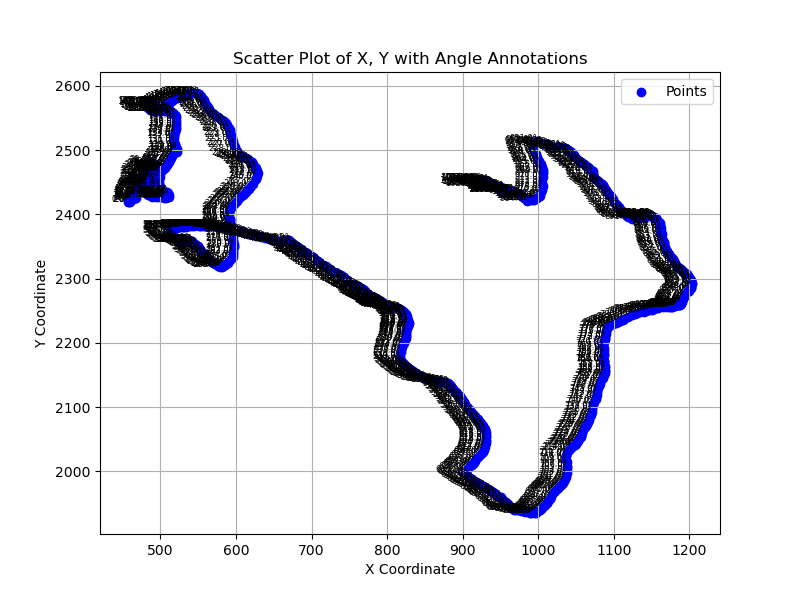

In [14]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Primary_Track['x'], Primary_Track['y'], color='blue', label='Points')

# Annotate each point with the corresponding angle
for i in range(len(Primary_Track)):
    x = Primary_Track.iloc[i]['x']
    y = Primary_Track.iloc[i]['y']
    # angle = Primary_Track.loc[i, 'angle']
    angle = i
    
    # Only annotate if angle is not NaN
    if not np.isnan(angle):
        plt.text(x, y, f'{angle:.1f}°', fontsize=6, ha='right')

# Additional plot settings
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Scatter Plot of X, Y with Angle Annotations')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [15]:
# Calculate Track Tortuosity

df_angles = CalcAngularVars(df_angles, Tortuosity_dist)

In [16]:
display(df_angles)

,event_id,x,y,z,energy,group_id,id,primary,trkID,cumulative_distance,angle,Tortuosity,Squiglicity
0,321963,457.804871,2419.205566,5031.409180,0.047790,0,1,1,0,0.000000,0.000000,1.640694,3.041761
1,321963,457.269562,2418.884277,5032.680664,0.002802,0,0,1,0,1.416494,23.628192,1.640694,3.041761
2,321963,459.474213,2419.708252,5025.476074,0.017360,0,2,1,0,8.995777,171.054639,1.605146,3.410287
3,321963,460.781311,2421.814209,5024.390625,0.002406,0,3,1,0,11.701652,52.667695,1.621362,3.534368
4,321963,461.652130,2422.145264,5022.738770,0.000719,0,4,1,0,13.598109,45.002118,1.599745,3.541496
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,321963,958.511597,2435.178223,4501.915527,0.007043,0,713,1,0,3525.939868,44.108023,1.817032,3.120042
1048,321963,957.833008,2435.121338,4503.982422,0.003943,0,712,1,0,3528.116051,88.057091,1.817032,3.120042
1049,321963,925.732910,2451.930176,4503.168945,0.033902,0,646,0,1,4.160420,175.907006,1.000000,0.000746
1050,321963,926.346130,2452.166504,4503.222168,0.000422,0,648,0,1,4.819755,30.861129,1.000000,0.000746


Text(0, 0.5, 'Angle [deg]')

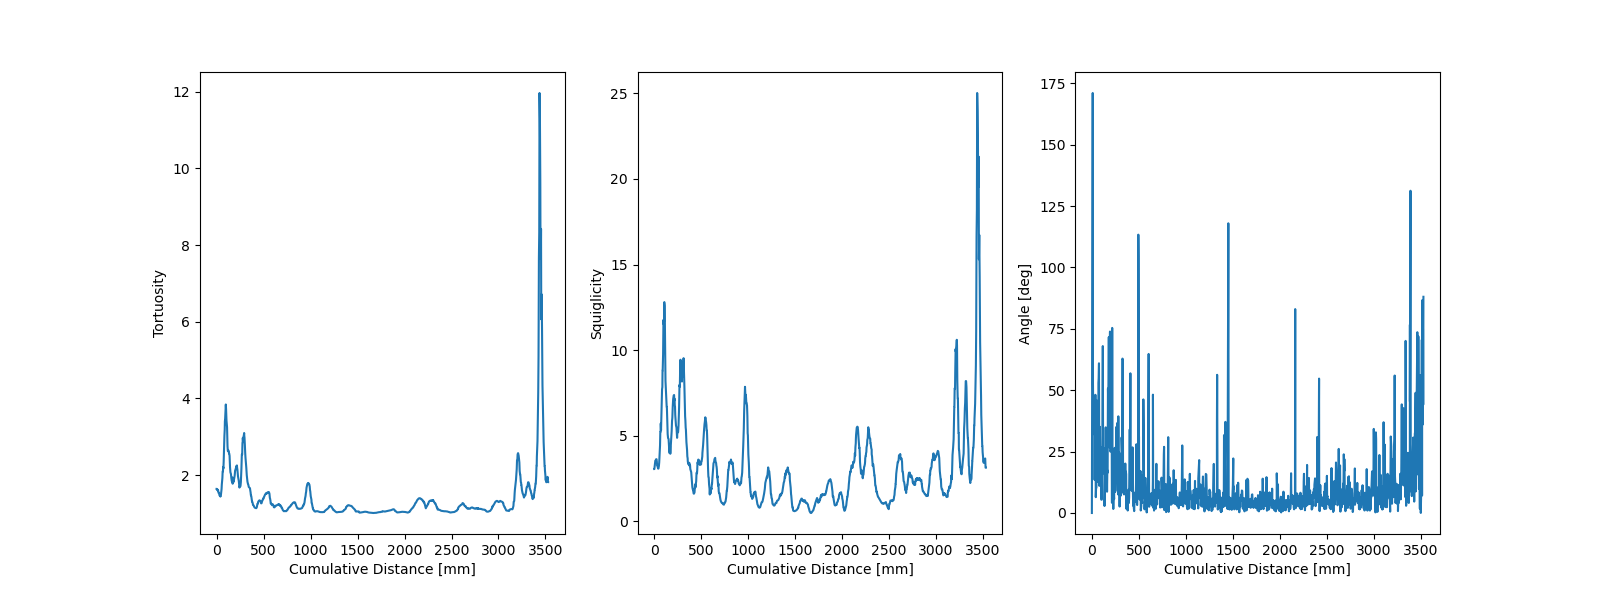

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

axs[0].plot(df_angles[df_angles.trkID == 0].cumulative_distance, df_angles[df_angles.trkID == 0]["Tortuosity"])
axs[0].set_xlabel("Cumulative Distance [mm]")
axs[0].set_ylabel("Tortuosity")

axs[1].plot(df_angles[df_angles.trkID == 0].cumulative_distance, df_angles[df_angles.trkID == 0]["Squiglicity"])
axs[1].set_xlabel("Cumulative Distance [mm]")
axs[1].set_ylabel("Squiglicity")


axs[2].plot(df_angles[df_angles.trkID == 0].cumulative_distance, df_angles[df_angles.trkID == 0]["angle"])
axs[2].set_xlabel("Cumulative Distance [mm]")
axs[2].set_ylabel("Angle [deg]")

In [18]:
Track_df = GetTrackdf(df_angles, RebuiltTrack, 500, 180, 200, 1) # scale these params inversely with the pressure

display(Track_df)

print(Track_df.energy.sum())



,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,Tortuosity1,Tortuosity2,Squiglicity1,Squiglicity2,label
0,321963,0,1,1,712,3528.116,2.395730,0.535234,0.469117,0.759996,0.482211,2.184907,3.116309,5.750774,6.992095,Primary
0,321963,1,0,639,648,4.820,0.034323,0.034323,0.034323,0.000000,0.034323,1.000000,1.000000,0.000746,0.000746,Delta0
0,321963,2,0,565,565,0.000,0.014731,0.014731,0.014731,0.014731,0.014731,0.000000,0.000000,0.000000,0.000000,Brem


2.444784006496775


In [19]:

Track_df_u = UpdateTrackMeta(Track_df, df_angles, 100)

display(Track_df_u)


Adding trk 1 Delta0 energy to blob2 as dist was 38.13938522338867


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,Tortuosity1,Tortuosity2,Squiglicity1,Squiglicity2,label
0,321963,0,1,1,712,3528.116,2.395730,0.535234,0.503440,0.759996,0.516534,2.184907,4.116309,5.750774,6.992841,Primary
0,321963,1,0,639,648,4.820,0.034323,0.034323,0.034323,0.000000,0.034323,1.000000,1.000000,0.000746,0.000746,Delta0
0,321963,2,0,565,565,0.000,0.014731,0.014731,0.014731,0.014731,0.014731,0.000000,0.000000,0.000000,0.000000,Brem
